In [84]:
# import libraries
import math
import pandas_ta as ta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from datetime import datetime as dt
from binance import Client
import csv
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [85]:
client = Client(None, None)

# get historical data
def get_data(symbol, interval, start, end):
    klines = client.get_historical_klines(symbol, interval, start, end)
    return klines

## Make csv function
def make_csv(symbol, coinData):
    """
    Create a CSV file for the historical data of the specified coin.

    :param symbol: The name of the coin for which the CSV file is created.
    :param coinData: Historical data of the desired coin in the form of a list of lists.
    :return: None
    """
    filename = f"data/{symbol}.csv"

    with open(filename, mode="w", newline="") as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerows(coinData)

    print(f"CSV file '{filename}' created successfully.")


def multiple_csv(symbols, interval, start, end):
    """
    Create CSV files for multiple coins with defined properties.

    :param symbols: List of multiple coin names for which CSV files are created.
    :param interval: Time period of candles.
    :param start: Starting date of candles data.
    :param end: End date of candles data.
    :return: None
    """
    for symbol in symbols:
        historical_data = get_data(symbol, interval, str(start), str(end))
        make_csv(symbol, historical_data)
        print(f"{symbol} CSV file is ready.")


def calculate_time(timestamp):
    """
    Convert timestamp to date and time.

    :param timestamp: Timestamp of the candle.
    :return: Date and time of the candle.
    """
    return dt.fromtimestamp(timestamp / 1000)


now = dt.now().strftime("%d %B %Y")

start = "1 January, 2020"
end = now

# get Bitcoin historical data and make csv
multiple_csv(["BTCUSDT"], client.KLINE_INTERVAL_1DAY, start, end)

CSV file 'data/BTCUSDT.csv' created successfully.
BTCUSDT CSV file is ready.


In [86]:
headers = ["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume",
           "Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]

# load data from csv file
df = pd.read_csv("data/BTCUSDT.csv", names=headers)
print(df.shape)
df.head()

(1459, 12)


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1577836800000,7195.24,7255.0,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010,8946.955535,6.459779e+07,0
1,1577923200000,7200.77,7212.5,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667,15141.611340,1.070608e+08,0
2,1578009600000,6965.49,7405.0,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854,35595.496273,2.577131e+08,0
3,1578096000000,7345.00,7404.0,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370,16369.382248,1.200351e+08,0
4,1578182400000,7354.19,7495.0,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209,19455.369564,1.446001e+08,0


In [87]:
df["Open time"] = df["Open time"].apply(calculate_time)
df["Close time"] = df["Close time"].apply(calculate_time)
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2019-12-31 21:00:00,7195.24,7255.0,7175.15,7200.85,16792.388165,2020-01-01 20:59:59.999,1.212145e+08,194010,8946.955535,6.459779e+07,0
1,2020-01-01 21:00:00,7200.77,7212.5,6924.74,6965.71,31951.483932,2020-01-02 20:59:59.999,2.259823e+08,302667,15141.611340,1.070608e+08,0
2,2020-01-02 21:00:00,6965.49,7405.0,6871.04,7344.96,68428.500451,2020-01-03 20:59:59.999,4.950986e+08,519854,35595.496273,2.577131e+08,0
3,2020-01-03 21:00:00,7345.00,7404.0,7272.21,7354.11,29987.974977,2020-01-04 20:59:59.999,2.198742e+08,279370,16369.382248,1.200351e+08,0
4,2020-01-04 21:00:00,7354.19,7495.0,7318.00,7358.75,38331.085604,2020-01-05 20:59:59.999,2.848487e+08,329209,19455.369564,1.446001e+08,0


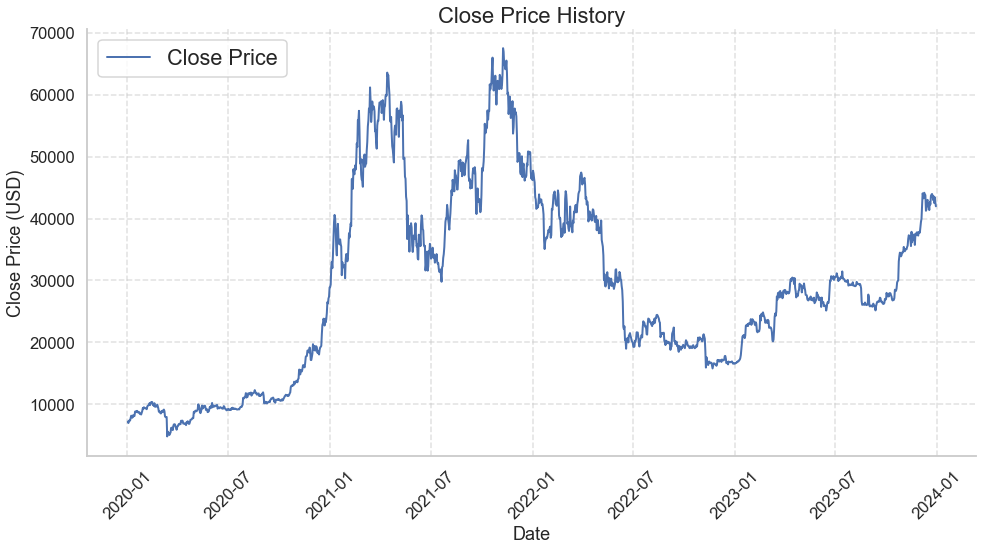

In [88]:
def visualize_data():
    """
    Visualize the historical data of the coin.

    :return: None
    """
    # Set Seaborn style
    sns.set(style="whitegrid", context="talk")

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the data with a smooth line using seaborn
    sns.lineplot(x="Close time", y="Close", data=df, ax=ax, linewidth=2, color='b', label="Close Price")

    # Set title and labels
    plt.title("Close Price History", fontsize=22)
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Close Price (USD)", fontsize=18)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add legend
    plt.legend(loc='upper left', fontsize='large')

    # Remove spines (top and right borders) for aesthetics
    sns.despine()

    # Display the plot
    plt.tight_layout()
    plt.show()

visualize_data()

# Create train and test split

In [90]:
def preprocessing_data(data, sequence_length=60, train_size=0.8):
    """
    Prepare the data for LSTM model.

    :param data: DataFrame containing the time series data.
    :param sequence_length: Length of the input sequences.
    :param train_size: Percentage of data to be used for training.
    :return: Tuple (X_train, y_train, X_test, y_test, train_close_len, scaler)
    """
    # Extract the "Close" column
    close = data["Close"].values
    
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(close.reshape(-1, 1))
    
    # Calculate the training data length
    train_close_len = int(len(close) * train_size)
    
    # Create training dataset
    X_train, y_train = [], []
    for i in range(sequence_length, train_close_len):
        X_train.append(scaled_data[i - sequence_length : i, 0])
        y_train.append(scaled_data[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape the data
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Ensure X_train and y_train have the same number of samples
    y_train = y_train[:X_train.shape[0]]

    # Create testing dataset
    X_test, y_test = [], []
    for i in range(train_close_len, len(scaled_data)):
        X_test.append(scaled_data[i - sequence_length : i, 0])
        y_test.append(scaled_data[i, 0])

    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape the data
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test, train_close_len, scaler

# Example usage:
X_train, y_train, X_test, y_test, train_len, scaler = preprocessing_data(df)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1107, 60, 1)
(1107,)
(292, 60, 1)
(292,)


In [95]:
# Create a function to build an LSTM model for time series forecasting. The function should take the following parameters:
# number of layers, number of units in each layer, activation, dropout rate, optimizer, loss function, and number of epochs, metrics.
# def build_model(layers, units, activation, dropout_rate, optimizer, loss, metrics):
#     """
#     Build an LSTM model for time series forecasting.

#     :param layers: Number of layers in the model.
#     :param units: Number of units in each layer.
#     :param activation: Activation function for the layers.
#     :param dropout_rate: Dropout rate for the layers.
#     :param optimizer: Optimizer for the model.
#     :param loss: Loss function for the model.
#     :param metrics: Evaluation metric for the model.
#     :return: LSTM model.
#     """
#     model = Sequential()

#     # Add LSTM layer
#     model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(Dropout(dropout_rate))

#     # Add more layers
#     for i in range(layers - 1):
#         model.add(LSTM(units=units, return_sequences=True))
#         model.add(Dropout(dropout_rate))

#     # Add final layer
#     model.add(LSTM(units=units))
#     model.add(Dropout(dropout_rate))

#     # Add Dense layer with one unit
#     model.add(Dense(units=1))

#     # Compile model
#     model.compile(loss=loss, metrics=metrics, optimizer=optimizer)

#     return model

def build_model(input_shape, lstm_units=[512, 256], dense_units=1, optimizer="Adam", loss="mean_squared_error", metrics=['mae']):
    """
    Build an LSTM model.

    :param input_shape: Input shape of the data.
    :param lstm_units: List of units for each LSTM layer.
    :param dense_units: Units for the Dense layer.
    :param optimizer: Optimizer for model compilation.
    :param loss: Loss function for model compilation.
    :param metrics: List of metrics for model compilation.
    :return: LSTM model.
    """
    model = Sequential()

    # Add LSTM layers based on the 'lstm_units' parameter
    for i, unit in enumerate(lstm_units):
        if i < len(lstm_units) - 1:
            model.add(LSTM(units=unit, return_sequences=True, activation='relu', input_shape=input_shape))
        else:
            model.add(LSTM(units=unit, activation='relu', return_sequences=False))

    # Add Dense layer
    model.add(Dense(units=dense_units))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model


# Create a function to train the model. The function should take the following parameters:
# model, training data, validation data, number of epochs, and batch size.
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    """
    Train the LSTM model.

    :param model: LSTM model.
    :param X_train: Training data.
    :param y_train: Training labels.
    :param X_test: Validation data.
    :param y_test: Validation labels.
    :param epochs: Number of epochs.
    :param batch_size: Batch size.
    :return: Trained LSTM model.
    """
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    return history

# Create a function to visualize the loss and metrics of the model.
def visualize_results(history):
    """
    Visualize the loss and metrics of the model.

    :param history: History of the model.
    :return: None
    """
    # Set Seaborn style
    sns.set(style="whitegrid", context="talk")

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the loss
    sns.lineplot(x=range(1, len(history.history["loss"]) + 1), y=history.history["loss"], ax=ax, linewidth=2,
                 color='b', label="Training Loss")

    # Plot the validation loss
    sns.lineplot(x=range(1, len(history.history["val_loss"]) + 1), y=history.history["val_loss"], ax=ax, linewidth=2,
                 color='r', label="Validation Loss")

    # Set title and labels
    plt.title("Training and Validation Loss", fontsize=22)
    plt.xlabel("Epoch", fontsize=18)
    plt.ylabel("Loss", fontsize=18)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add legend
    plt.legend(loc='upper right', fontsize='large')

    # Remove spines (top and right borders) for aesthetics
    sns.despine()

    # Display the plot
    plt.tight_layout()
    plt.show()

# model = build_model(layers=2, units=128, activation="tanh", dropout_rate=0.2, optimizer="adam", loss="mse", metrics=["mae"])
build_model(input_shape=(X_train.shape[1], X_train.shape[2]), lstm_units=[512, 256], dense_units=1, optimizer="Adam", loss="mean_squared_error", metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 60, 128)           66560     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

Epoch 1/3
12/12 [==============================] - 6s 501ms/step - loss: 0.0058 - mae: 0.0576 - val_loss: 3.7638e-04 - val_mae: 0.0145
Epoch 2/3
12/12 [==============================] - 7s 580ms/step - loss: 0.0035 - mae: 0.0484 - val_loss: 6.9470e-04 - val_mae: 0.0232
Epoch 3/3
12/12 [==============================] - 6s 529ms/step - loss: 0.0028 - mae: 0.0422 - val_loss: 4.0575e-04 - val_mae: 0.0145


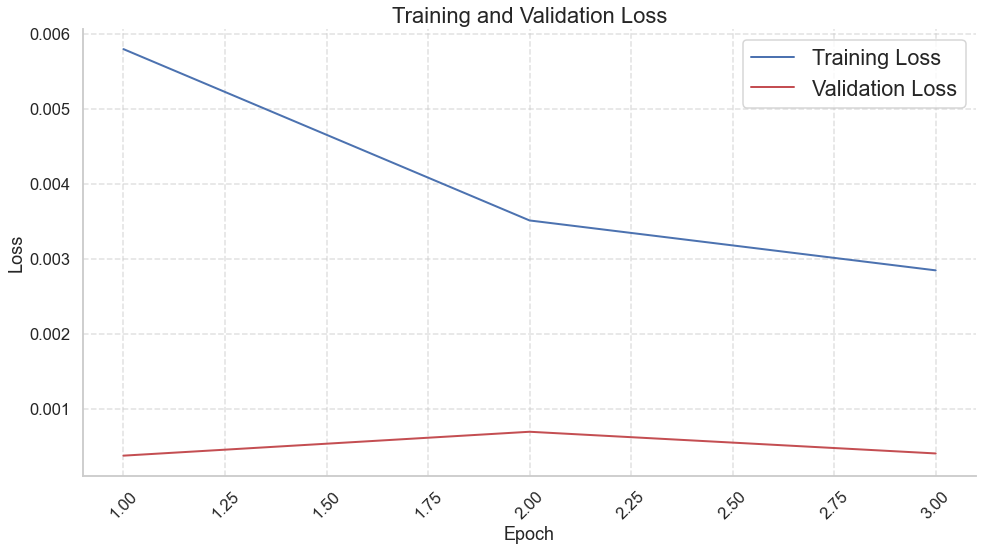

In [96]:
# Train the model
history = train_model(model, X_train, y_train, X_test, y_test, epochs=3, batch_size=100 )

# Visualize the loss and metrics of the model
visualize_results(history)


In [97]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


def make_predictions(model, X_test, scaler):
    """
    Make predictions using the trained LSTM model.

    :param model: Trained LSTM model.
    :param X_test: Testing input data.
    :param scaler: Scaler used for normalization.
    :return: Predictions.
    """
    # Make predictions
    predictions = model.predict(X_test)

    # Invert predictions
    predictions = scaler.inverse_transform(predictions)

    return predictions

# Make predictions
predictions = make_predictions(model, X_test, scaler)
predictions

array([[19184.719],
       [19815.367],
       [20943.646],
       [22085.898],
       [23100.607],
       [24278.844],
       [25340.375],
       [26314.736],
       [27050.451],
       [27577.861],
       [27761.123],
       [27868.908],
       [27805.068],
       [27628.73 ],
       [27492.771],
       [27267.79 ],
       [27013.7  ],
       [26965.398],
       [27023.469],
       [27199.213],
       [27418.998],
       [27577.715],
       [27603.703],
       [27604.781],
       [27614.191],
       [27614.254],
       [27584.363],
       [27538.916],
       [27554.543],
       [27838.875],
       [28364.832],
       [28892.357],
       [29385.072],
       [29790.14 ],
       [30045.842],
       [30166.92 ],
       [30048.436],
       [29953.531],
       [29656.367],
       [29158.54 ],
       [28438.701],
       [27777.512],
       [27247.95 ],
       [26872.094],
       [26782.734],
       [26918.824],
       [27345.084],
       [27865.273],
       [28324.273],
       [28658.402],


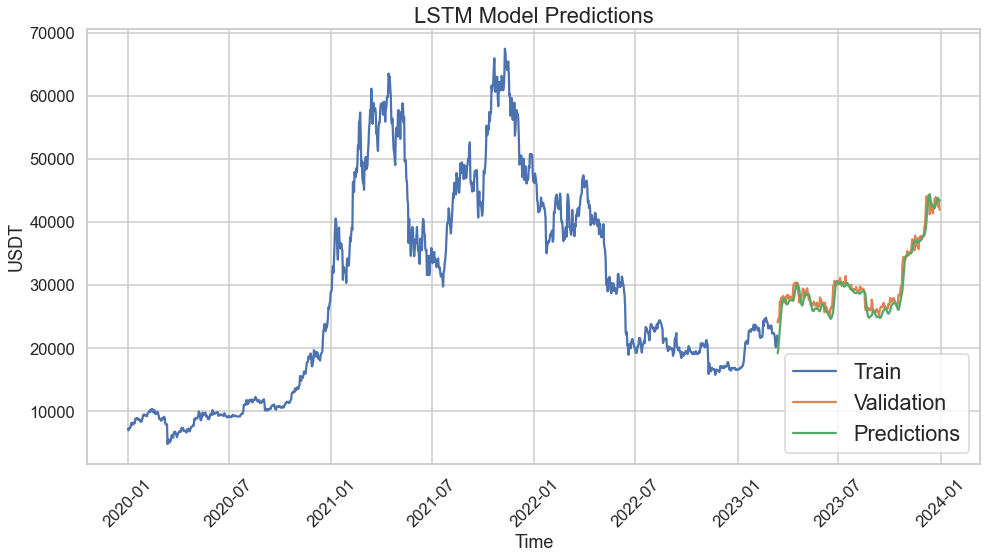

In [98]:
def plot_predictions(data, train_len, predictions):
    """
    Plot LSTM model predictions.

    :param data: DataFrame containing the time series data.
    :param train_len: Length of the training data.
    :param predictions: Predictions from the LSTM model.
    :return: None
    """
    # Create a DataFrame for better indexing
    # Assuming the column name is "Close Time" for time and "Close" for close prices
    time_column = "Close time"
    close_column = "Close"
    
    train = data[close_column][:train_len]
    valid = data[close_column][train_len:train_len + len(predictions)]
    valid["Predictions"] = predictions

    # Set Seaborn style
    sns.set(style="whitegrid", context="talk")

    # Create a figure and axes
    plt.figure(figsize=(16, 8))
    
    # Plot the training data
    plt.plot(data[time_column][:train_len], train, label="Train")

    # Plot the validation data and predictions
    plt.plot(data[time_column][train_len:train_len + len(predictions)], valid[:len(predictions)], label="Validation")
    plt.plot(data[time_column][train_len:train_len + len(predictions)], valid["Predictions"], label="Predictions")

    # Set title and labels
    plt.title("LSTM Model Predictions", fontsize=22)
    plt.xlabel("Time", fontsize=18)
    plt.ylabel("USDT", fontsize=18)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add legend
    plt.legend(loc="lower right", fontsize="large")

    # Show the plot
    plt.show()

# Example usage:
plot_predictions(df, train_len, predictions)

In [ ]:
# # Create a function to predict the future values of the coin.
# def predict_future(model, data, future_periods, scaler):
#     """
#     Predict the future values of the coin.

#     :param model: LSTM model.
#     :param data: Historical data of the coin.
#     :param future_periods: Number of future periods to predict.
#     :param scaler: Scaler for the data.
#     :return: Predictions on the future values of the coin.
#     """
#     # Predict future values
#     predictions = model.predict(data)
#     predictions = scaler.inverse_transform(predictions)

#     # Predict future values for the next number of periods
#     future_predictions = []
#     last_prediction = predictions[-1]

#     for i in range(future_periods):
#         last_data = data[-1]
#         last_data = np.reshape(last_data, (1, last_data.shape[0], last_data.shape[1]))
#         next_pred = model.predict(last_data)
#         next_pred = scaler.inverse_transform(next_pred)
#         future_predictions.append(next_pred[0][0])
#         last_data = np.append(last_data[0], next_pred[0])
#         data = np.append(data, [last_data], axis=0)

#     # Add future predictions to the predictions list
#     predictions = np.append(predictions, future_predictions)

#     return predictions

# # Predict future values
# future_periods = 30
# future_predictions = predict_future(model, X_test[-future_periods:], future_periods, scaler)

# # Create a function to visualize the future predictions of the model.
# def visualize_future_predictions(future_predictions):
#     """
#     Visualize the future predictions of the model.

#     :param future_predictions: Predictions on the future values of the coin.
#     :return: None
#     """
#     # Set Seaborn style
#     sns.set(style="whitegrid", context="talk")

#     # Create a figure and axes
#     fig, ax = plt.subplots(figsize=(14, 8))

#     # Plot the actual values
#     sns.lineplot(x=range(1, len(df["Close"]) + 1), y=df["Close"], ax=ax, linewidth=2, color='b', label="Actual")

#     # Plot the future predictions
#     sns.lineplot(x=range(len(df["Close"]), len(df["Close"]) + len(future_predictions)), y=future_predictions, ax=ax, linewidth=2,
#                  color='r', label="Future Predictions")

#     # Set title and labels
#     plt.title("Actual Close Price vs Future Predictions", fontsize=22)
#     plt.xlabel("Days", fontsize=18)
#     plt.ylabel("Close Price (USD)", fontsize=18)

#     # Rotate x-axis labels for better readability
#     plt.xticks(rotation=45)

#     # Add grid for better readability
#     plt.grid(True, linestyle='--', alpha=0.6)

#     # Add legend
#     plt.legend(loc='upper left', fontsize='large')

#     # Remove spines (top and right borders) for aesthetics
#     sns.despine()

#     # Display the plot
#     plt.tight_layout()
#     plt.show()

# visualize_future_predictions(future_predictions)